## Analyze A/B Test Results

By Michael Padden

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('group=="treatment"').landing_page.value_counts()[1]+df.query('group=="control"').landing_page.value_counts()[1]

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df.query('group=="treatment" & landing_page=="old_page"').index

Int64Index([   308,    327,    357,    685,    713,    776,    889,   1037,
              1106,   1376,
            ...
            293240, 293302, 293391, 293443, 293530, 293773, 293817, 293917,
            294014, 294252],
           dtype='int64', length=1965)

In [9]:
df.query('group=="control" & landing_page=="new_page"').shape

(1928, 5)

In [10]:
dftest=df.drop(df.query('group=="treatment" & landing_page=="old_page"').index)
df2=dftest.drop(dftest.query('group=="control" & landing_page=="new_page"').index)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [12]:
df2.shape[0]==df.shape[0]-(df.query('group=="treatment"').landing_page.value_counts()[1]+df.query('group=="control"').landing_page.value_counts()[1])

True

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.shape

(290585, 5)

In [14]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2.user_id.value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [16]:
df2.query('user_id=="773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2.drop(1899,inplace=True)

In [18]:
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df2.query('group=="control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df2.query('group=="treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
df2.query('landing_page=="new_page"').shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Based on the results above, the conversion rate is very similar for the tested control and treatment groups. In fact, the probability of control group (old page) was slightly higher than the probability of the treatment group (new page). There is not sufficient evidence or any evidence at all that the new page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


$H_0: $  $p_{new}$ - $p_{old}$ <=0

$H_1: $  $p_{new}$ - $p_{old}$ > 0


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
pnew=df2.converted.mean()
pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
pold=df2.converted.mean()
pold

0.11959708724499628

c. What is $n_{new}$?

In [25]:
nnew=df2.query('landing_page=="new_page"').shape[0]
nnew

145310

d. What is $n_{old}$?

In [26]:
nold=df2.query('landing_page=="old_page"').shape[0]
nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted=np.random.binomial(1,pnew,nnew)

In [28]:
new_page_converted.mean()

0.12057669809373064

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted=np.random.binomial(1,pold,nold)

In [30]:
old_page_converted.mean()

0.1189476437628206

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
diff=new_page_converted.mean()- old_page_converted.mean()

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [32]:
p_diffs=[]
for i in range (10000):
    new=np.random.binomial(1,pnew,nnew).mean()
    old=np.random.binomial(1,pold,nold).mean()
    diff=new-old
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

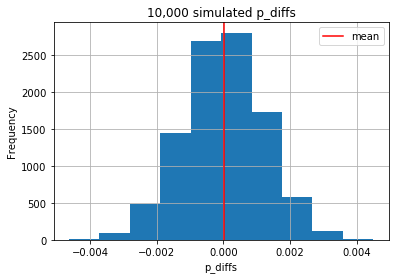

In [33]:
p_diffs=np.array(p_diffs)
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('10,000 simulated p_diffs')
plt.grid()
plt.axvline(p_diffs.mean(), color='r', label='mean')
plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
actual_diff= df2.query('group=="treatment"')['converted'].mean() - df2.query('group=="control"')['converted'].mean()
actual_diff

-0.0015782389853555567

In [35]:
(actual_diff < p_diffs).mean()

0.905

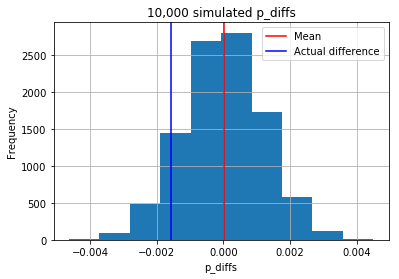

In [36]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('10,000 simulated p_diffs')
plt.grid()
plt.axvline(p_diffs.mean(), color='r', label='Mean')
plt.axvline(x=actual_diff, color='b',  label="Actual difference")
plt.legend();

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:** In part j we found the p-value. The p-value is the probability of observing your statistic or one further from the mean given that the null hypothesis is true. In this case, the p-value is very large so we fail to reject the null.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm

convert_old = sum(df2.query('group=="control"')['converted'])
convert_new = sum(df2.query('group=="treatment"')['converted'])
n_old = df2.query('group=="control"').shape[0]
n_new = df2.query('group=="treatment"').shape[0]


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [38]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:** A z-score represents how many standard deviations away our data point is from the mean and we found it to be 1.3109. Also we found when using the model that the p-value is 0.905 which is very close to what we calculated in part j (0.906). After looking at Statsmodels we again fail to reject the null. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression (Binary Classifcation).**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
df3=df2

In [40]:
df3['intercept']=1

In [41]:
other=pd.get_dummies(df3.group)
df3['ab_page']=(other.treatment)


In [42]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [43]:
logreg = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = logreg.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        12:29:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:**

The p-value for 'ab_page' is .19

Part II and Part III differ because in Part II, the p-value was calculated for one tail. In Part III, the null hypothesis was that the difference between the pages is equal to 0, and the alternative hypothesis was the difference between the pages is greater or less than 0 which means it had two tails.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**

You always want to at least consider other factors to add to the regression model. An option in this case is the duration of the experiment or the time of day the experiment was given. While there are advantages of adding other factors there can also be disadvantages. Some variables may not affect the outcome or add complexity.

In [45]:
# Test the duration of the experiment
timestamp = pd.to_datetime(df.timestamp).sort_values(ascending=True)
duration = np.array(timestamp)
td = duration[-1] - duration[0]
td

numpy.timedelta64(1900789081927000,'ns')

In [46]:
days = td.astype('timedelta64[D]')
days

numpy.timedelta64(21,'D')

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [62]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [63]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [64]:
### Create the necessary dummy variables
df_new[['canada','uk','us']]=pd.get_dummies(df_new.country)

In [65]:
logreg2 = sm.Logit(df_new['converted'], df_new[['intercept','canada','us']])
results2 = logreg2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 Dec 2018   Pseudo R-squ.:               1.521e-05
Time:                        12:35:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
canada        -0.0507      0.028     -1.786      0.074      -0.106       0.005
us            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

In [66]:
1/np.exp(-0.0507), 1/np.exp(0.0099)

(1.052007243765014, 0.9901488436829571)

**Answer:**

There is a very minimal effect on the conversion from the country. Not statistically significant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [67]:
#Interaction Variables 
df_new['canada_interaction']=df_new.ab_page*df_new.canada
df_new['us_interaction']=df_new.ab_page*df_new.us
df_new['uk_interaction']=df_new.ab_page*df_new.uk
df_new

,country,timestamp,group,landing_page,converted,intercept,ab_page,canada,uk,us,canada_interaction,us_interaction,uk_interaction
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,0,1
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,0,1,0,0,0,1
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,0,0,1,0,1,0
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1,0,0,1,0,1,0
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1,0,0,1,0,1,0


In [71]:
### Fit Your Linear Model And Obtain the Results

logreg3 = sm.Logit(df_new['converted'], df_new[['canada_interaction', 'us_interaction','uk_interaction',  'intercept']])

results3 = logreg3.fit()
results3.summary()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 Dec 2018   Pseudo R-squ.:               3.351e-05
Time:                        12:38:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.06785
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
canada_interaction    -0.0827      0.038     -2.176      0.030      -0.157      -0.008
us_interaction        -0.0183      0.013     -1.449      0.147      -0.043       0.006
uk_interaction         0.0074      0.018      0.410      0.682      -0.028       0.043
intercept             -1.9888      0.008   -246.669      0.000      -2.005      -1.973
======================================================================================
"""

When looking at the interactions there is not evidence to reject the null.

***REGRESSION:*** In the Logistic Regression models that I used, I found that the conversion rate does not substantially change for control group vs treatment group or depending on the country. This indicates that we fail to reject the Null Hypothesis and keep the existing page.

<a id='conclusions'></a>
## Conclusions

*** In this project we used three approaches to test whether we should use a new webpage or keep the old one.***

***Probability:***

We found that there was about a 50% chance of any given user getting the control vs the treatment page. We also found that the control had a .2% (very small) more likely chance to conversion than the treatment.

***A/B Test:***

In the A/B test we found p-value of 0.906 which is very large. We double checked this value using statsmodels and concurred to fail to reject the null hypothesis.

***Regression:***

Using a regression approach we modeled a Logistic Regression for binary classification. We not only looked at the different types of pages but also looked at the country. After running the model we found a high p-value and again we failed to reject the null hypothesis. 

***Based on our findings we decided to stick with the original page. We also noticed that the A/B test has only been running for a few weeks and suggest to continue running the test to get more data. With more data there may be new results that show we should reject the Null Hypothesis but that is not the case currently.***



## Resources

http://knowledgetack.com/python/statsmodels/proportions_ztest/

https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

https://stackoverflow.com/questions/18215317/extracting-days-from-a-numpy-timedelta64-value

https://en.wikipedia.org/wiki/P-value

https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/